# Assignment 3 - SMAI - Multinomial Logistic Regression

In [2]:
import os
import sys

# enter the Foldername here:
FOLDERNAME = "/home/richard/play/IIITH/sem5/smai/assignments/assignment-3-fine-man"

if FOLDERNAME is None or not os.path.exists(FOLDERNAME):
    FOLDERNAME = os.getcwd()

PATHNAME = f"{FOLDERNAME}"
sys.path.append(f"{FOLDERNAME}")

# DATA_FOLDER = os.path.join(FOLDERNAME, "SMAI-Dataset-release/IIIT-CFW")
DATA_FOLDER = os.path.join(FOLDERNAME, "datasets")
print(DATA_FOLDER)

/home/richard/play/IIITH/sem5/smai/assignments/assignment-3-fine-man/datasets


In [3]:
import numpy as np
import pandas as pd
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# some magic so that the notebook will reload external python modules;
# see https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Problem 1 - Multinomial Logistic Regression

### 1.1 Dataset Analysis and Preprocessing

#### (1.1.1) - Describing the data

In [5]:
wine_df = pd.read_csv(os.path.join(DATA_FOLDER, "wineqt.csv"))

# printing the mean, standard deviation, min and max for each column
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
def load_wine_dataset(path):
    wine_df = pd.read_csv(path)
    X, y = wine_df.iloc[:, :-2].to_numpy(), wine_df.iloc[:, -2].to_numpy()
    return X, y

X, y = load_wine_dataset(os.path.join(DATA_FOLDER, "wineqt.csv"))
y -= np.min(y) # making the range of classes to be between [0, 5]

print(f"Shape of wine data: {X.shape}")
print(f"Shape of wine target classes: {y.shape}")

Shape of wine data: (1143, 11)
Shape of wine target classes: (1143,)


#### (1.1.2) - Plotting Distribution of labels

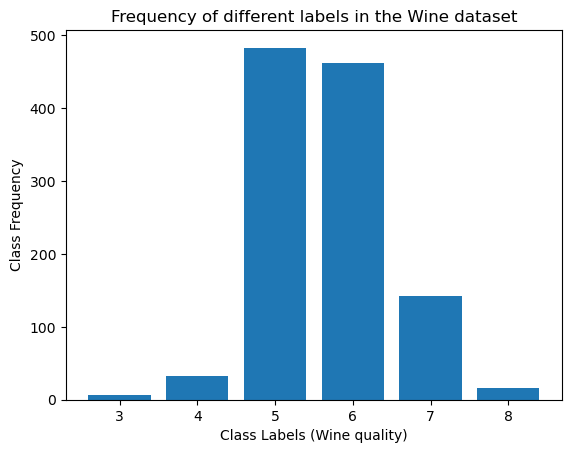

In [15]:
unique_labels, label_counts = np.unique(wine_df['quality'].to_numpy(), return_counts=True)

plt.bar(unique_labels, label_counts)

plt.title("Frequency of different labels in the Wine dataset")
plt.xlabel("Class Labels (Wine quality)")
plt.ylabel("Class Frequency")

plt.show()

#### (1.1.3) - Train, Val, Test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.33, random_state=42
)

print(f"Size of training set: {X_train.shape}")
print(f"Size of validation set: {X_val.shape}")
print(f"Size of testing set: {X_test.shape}")

Size of training set: (800, 11)
Size of validation set: (114, 11)
Size of testing set: (229, 11)


#### (1.1.4) - Standarizing the data

In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

print(f"Mean of training features:\n{scaler.mean_}\n")
print(f"Variance of training features: {scaler.var_}")

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Mean of training features:
[ 8.24225     0.52955625  0.2644375   2.5051875   0.08655875 15.703125
 45.54125     0.99668604  3.314925    0.6580125  10.437125  ]

Variance of training features: [2.84383994e+00 3.15808968e-02 3.70914336e-02 1.67394496e+00
 2.14769905e-03 1.04172178e+02 9.53580798e+02 3.55576542e-06
 2.28689944e-02 2.82864248e-02 1.13723701e+00]


### 1.2 - Model Building From Scratch